# Punto 1
Fit the monthly data for Japan 2003 oil consumption, shown in the following table, with
the periodic model (4.9), and calculate the RMSE:

Month |Oil use $(10^6)$ bb/day 
-----|-----
Jan|6.224
Feb|6.665
Mar|6.241
Apr|5.302
May|5.073
Jun|5.127
Jul|4.994
Aug|5.012
Sept|5.108
Oct|5.377
Nov|5.510
Dic|6.372

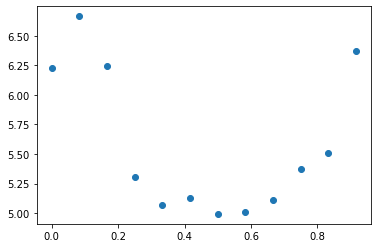

In [2]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
from scipy import linalg

x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])/12
y = np.array([6.224,6.665,6.241,5.302,5.073,5.127,4.994,5.012,5.108,5.377,5.510,6.372])
plt.scatter(x,y,marker ="o")
plt.show()

# Solution of problem 1


In [8]:
A=np.zeros([12,4])
A[:,0] = np.array([1,1,1,1,1,1,1,1,1,1,1,1])
A[:,1] = np.array(np.cos(2*pi*x))
A[:,2] = np.array(np.sin(2*pi*x))
A[:,3] = np.array(np.cos(4*pi*x))


b = np.array(y)

B = A.T@A
C = A.T@b

x_r = linalg.solve(B,C)
print(x_r)
print('la solcuión es',x_r[0],'+',x_r[1],'*cos(2*pi*x) +',x_r[2],'*sin(2*pi*x) +',x_r[3],'*cos(4*pi*x)')


[5.58375    0.7541236  0.12195895 0.1935    ]
la solcuión es 5.583749999999999 + 0.7541236033612172 *cos(2*pi*x) + 0.12195894683899516 *sin(2*pi*x) + 0.1935000000000002 *cos(4*pi*x)
La funcion es: y = 5.58375 + 0.75412 cos(2πt) + 0.12196 sin(2πt)+ 0.19350 cos(4πt)


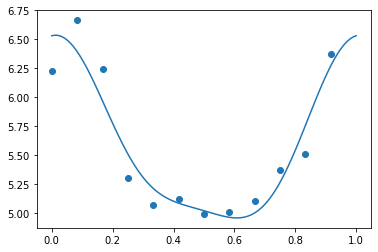

In [9]:
# Plot the data and aproximation
t_plot = np.linspace(0,1,100)
y_plot = x_r[0] + x_r[1]*np.cos(2*pi*t_plot) + x_r[2]*np.sin(2*pi*t_plot) + x_r[3]*np.cos(4*pi*t_plot)
plt.plot(t_plot,y_plot)
plt.scatter(x,y,marker ="o")
plt.show()

# Problem 2
The temperature data in Example 4.6 was taken from the Weather Underground website
www.wunderground.com. Find a similar selection of hourly temperature data from a
location and date of your choice, and fit it with the two sinusoidal models of the
example.

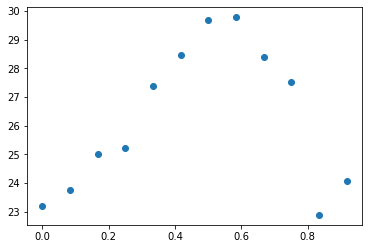

In [10]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])/12
y = np.array([23.21,23.77,25.02,25.21,27.38,28.48,29.67,29.78,28.39,27.52,22.89,24.07])

plt.scatter(x,y,marker ="o")
plt.show()


# Soluciton of problem 2

In [13]:
A=np.zeros([12,3])
A[:,0] = np.array([1,1,1,1,1,1,1,1,1,1,1,1])
A[:,1] = np.array(np.cos(2*pi*x))
A[:,2] = np.array(np.sin(2*pi*x))
b = np.array(y)

B = A.T@A
C = A.T@b

x_r = linalg.solve(B,C)
print(x_r)
print('the solution is',x_r[0],'+',x_r[1],'*cos(2*pi*x) +',x_r[2],'*sin(2*pi*x)')


[26.2825     -3.23566412 -0.35667526]
the solution is 26.2825 + -3.2356641179056425 *cos(2*pi*x) + -0.35667525796023897 *sin(2*pi*x)


# plot the solution of problem 2

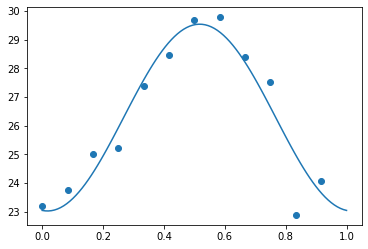

In [14]:
t_plot = np.linspace(0,1,100)
y_plot = x_r[0] + x_r[1]*np.cos(2*pi*t_plot) + x_r[2]*np.sin(2*pi*t_plot)   
plt.plot(t_plot,y_plot)
plt.scatter(x,y,marker ="o")
plt.show()

# problem 3
Consider the world population data of Computer Problem 3.1.1. Find the best
exponential fit of the data points by using linearization. Estimate the 1980 population,
and find the estimation error.
Year |Population
-----|-----
1960|3039585530
1970|3707475887
1980|5281653820
1990|6079603571

In [18]:
x = np.array([1960, 1970, 1990, 2000])
y = np.array([3039585530, 3707475887, 5281653820, 6079603571])
Ones=np.ones(4)
A=np.zeros([4,2])
A[:,0]=Ones
A[:,1]=x
b = np.log(y)
B = A.T@A
C = A.T@b

x = linalg.solve(B,C)
c1 = np.exp(x[0])
print(c1)
print("The function solution is: y = %.10f exp(%.5fx)" % (c1, x[1]))

pob_estimada = c1*np.exp(x[1]*1980)
print("The estimated population is  %.0f" % pob_estimada)

pob_ejercicio =  4452584592
print("Error: %f" % abs(pob_estimada - pob_ejercicio) ,"trillons")

4.726389209057498e-06
The function solution is: y = 0.0000047264 exp(0.01740x)
The estimated population is  4361485915
Error: 91098676.589959 trillons


# Problem 4
Consider the carbon dioxide concentration data of Exercise 3.1.17. Find the best
exponential fit of the difference between the $CO_2$ level and the background (279 ppm) by using linearization. Estimate the 1950 $CO_2$ concentration, and find the estimation error.

year| CO2 concentration
-----|-----
1800|280
1850|283
1900|291
2000|370

In [20]:
x = np.array([1800, 1850, 1900, 2000]) 
y = np.array([280, 283, 291, 370]) - 279
Ones=np.ones(4)
A=np.zeros([4,2])
A[:,0]=Ones
A[:,1]=x
b = np.log(y)

B = A.T@A
C = A.T@b

x = linalg.solve(B,C)
c1 = np.exp(x[0])

print("The function is: y = %.5f exp(%.5fx) " % (c1, x[1]),"\n")

co2_estimate = c1*np.exp(x[1]*1950) + 279
print("The estimated population for the year is %.5f" % co2_estimate, "\n")


co2_ejercicio =  310 ## 
print("Error: %f" % abs(co2_estimate - co2_ejercicio))

The function is: y = 0.00000 exp(0.02224x)  

The stimated population for the year is 311.64362 

Estime la concentración de CO2 de 1950 y encuentre el error de estimación.
Error de estimación: 1.643618


# problem 5
a.  Find the time at which the maximum concentration is reached in model (4.21). 



$$y=c_1t e^{c_2t}$$
$$y'=c_1e^{c_2t}+c_1c_2e^{c_2t}$$
to find the critical point, we need to solve the equation:
$$y'=0$$
$$c_1e^{c_2t}+c_1c_2e^{c_2t}=0$$
$$c_1e^{c_2t}(1+tc_2)=0$$
so, $c_1e^{c_2t}\neq 0$ then, $1+tc_2=0$  then, $$t=\frac{-1}{c_2},$$
is the time at which the maximum concentration is reached.

b.  Use an equation solver to estimate the half-life from the model in Example 4.11.

In [24]:
x = np.arange(8) + 1
y = np.array([8.0, 12.3, 15.5, 16.8, 17.1, 15.8, 15.2, 14.0])
A=np.zeros([8,2])
A[:,0] = np.ones(8)
A[:,1] = np.array(x)

b = np.log(y) - np.log(x)

B = A.T@A
C = A.T@b

x_r = linalg.solve(B,C)

c1 = np.exp(x_r[0])

print("the function is: y = %.5f x exp(%.5fx) " % (c1, x_r[1]),"\n")


t_max = -1/(x_r[1])
y_max = c1 *t_max* np.exp(x_r[1]*t_max)
print('the maximun concentration is reached in the point','(',t_max,',', y_max,')')

the function is: y = 9.79016 x exp(-0.21514x)  

the maximun concentration is reached in the point ( 4.648205528501931 , 16.74097023931853 )


Now, we calculate the half-life of the model:

$\frac{1}{m}\sum^m_{i=1} y_i=\overline{y}$

In [26]:
prom = sum(y)/8
print('the half-life is',prom)

the half-life is 14.337499999999999


To find the time at which the half-life is reached, we need to solve the equation:
 
 $14.33 = 9.74016te^{-0.21514t}$ , this  is equivalent to the problem: find  roots of the equation:

 $$14.33 - 9.74016te^{-0.21514t}=0,$$

 Which is optained by approximating, we get:
 $t = 9.24$ h, Thus the half-lefe is reached in the point $t=9.24$ with a concentration of 12.03 ng/ml.

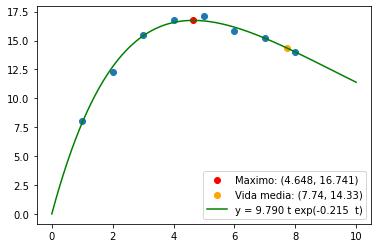

In [30]:
x_range = np.linspace(0, 10, 1000)
y_range = c1 *x_range* np.exp(x_r[1]*x_range)

plt.scatter(x, y)
plt.scatter(t_max, y_max, c='r',label="Maximo: (%.3f, %.3f)" % (t_max,y_max))
plt.scatter(7.74, 14.33, c="orange",label="Vida media: (7.74, 14.33)" )
plt.plot(x_range, y_range, c='g', label = "y = %.3f t exp(%.3f  t)" % (c1 , x_r[1]))
plt.legend()

# Problema 6
The bloodstream concentration of a drug, measured hourly after administration, is given
in the accompanying table. Fit the model (4.21). Find the estimated maximum and the
half-life. Suppose that the therapeutic range for the drug is 4 –15 ng/ml. Use the equation solver of your choice to estimate the time the drug concentration stays within therapeutic levels.

hou|concetration (ng/ml)
----|-----
1|6.2
2|9.5
3|12.3
4|13.9
5|14.6
6|13.5
7|13.3
8|12.7
9|12.4
10|11.9



In [32]:
x = np.arange(10) + 1
y = np.array([6.2, 9.5, 12.3, 13.9, 14.6,13.5,13.3,12.7,12.4,11.9])

A0 = np.array([1,1,1,1,1,1,1,1,1,1])
A1 = np.array(x).T

A = np.array([ A0.T , A1.T]).T
b = np.log(y) - np.log(x)

B = A.T@A
C = A.T@b

x_r = linalg.solve(B,C)

c1 = np.exp(x_r[0])

print("The function is : y = %.5f t exp(%.5ft) " % (c1, x_r[1]),"\n")

La funcion es: y = 7.12203 t exp(-0.18385t)  



In [31]:
t_max = -1/(x_r[1])
y_max = c1 *t_max* np.exp(x_r[1]*t_max)
print('The maximun concentration is reached in the point',t_max, y_max)

The maximun concentration is reached in the point 4.648205528501931 16.74097023931853


In [37]:
#Hallamos el promedio de la concentracion 
prom = sum(y)/10
print(prom)

12.030000000000001


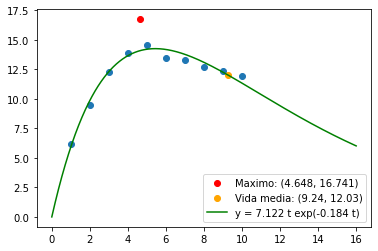

In [36]:
x_range = np.linspace(0, 16, 1000)
y_range = c1 *x_range* np.exp(x_r[1]*x_range)

plt.scatter(x, y)
plt.scatter(t_max, y_max, c='r',label="Maximo: (%.3f, %.3f)" % (t_max,y_max))
plt.scatter(9.24, 12.03, c="orange",label="Vida media: (9.24, 12.03)" )
plt.plot(x_range, y_range, c='g', label = "y = %.3f t exp(%.3f t)" % (c1 , x_r[1]))
plt.legend()

# problem 7
The file windmill.txt, available from the textbook website, is a list of 60 numbers
which represent the monthly megawatt-hours generated from Jan. 2005 to Dec. 2009 by a
wind turbine owned by the Minnkota Power Cooperative near Valley City, ND. The data
is currently available at http://www.minnkota.com. For reference, a typical home uses
around 1 MWh per month.

(a) Find a rough model of power output as a yearly periodic function. Fit the data to
equation (4.9),
$$f (t) = c_1 + c_2 \cos 2\pi t + c_3 \sin 2\pi t + c_4 \cos 4\pi t$$
where the units of t are years, that is $0 \leq t \leq 5$, and write down the resulting function.

In [42]:
x = np.linspace(0, 5, 60)

y = np.loadtxt("windmill.txt", dtype=int)
N=len(y)
A=np.zeros([N,4])
A[:,0] = np.ones(N)
A[:,1] = np.array(np.cos(2*pi*x)).T
A[:,2] = np.array(np.sin(2*pi*x)).T
A[:,3]= np.array(np.cos(4*pi*x)).T


b = np.array(y)

B = A.T@A
C = A.T@b

x_r =linalg.solve(B,C)

print("The solution of function is  y = %.2f + %.2f cos(2πt) + %.2f sin(2πt)+ %.2f cos(4πt)" % (x_r[0], x_r[1], x_r[2], x_r[3]))

The solution of function is  y = 229.71 + 33.53 cos(2πt) + 25.57 sin(2πt)+ -22.16 cos(4πt)


(b) Plot the data and the model function for years $0 \leq t \leq 5$. What features of the data are
captured by the model?

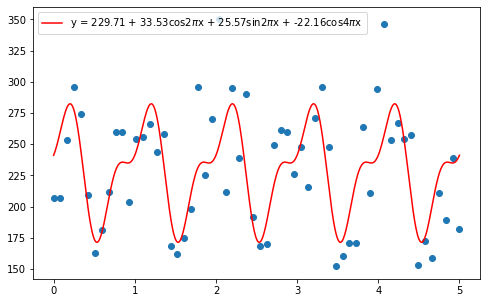

In [43]:
x_range = np.linspace(0, 5, 1000)
y_range = x_r[0] + x_r[1]*np.cos(2*pi*x_range)+ x_r[2]*np.sin(2*pi*x_range) + x_r[3]*np.cos(4*pi*x_range)

plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(x_range, y_range, c='r',label="y = %.2f + %.2fcos2$\pi$x + %.2fsin2$\pi$x + %.2fcos4$\pi$x" % (x_r[0], x_r[1], x_r[2], x_r[3]))
plt.legend()

plt.show()

# problem 8
The file scrippsy.txt, available from the textbook website, is a list of 50 numbers
which represent the concentration of atmospheric carbon dioxide, in parts per million by
volume (ppv), recorded at Mauna Loa, Hawaii, each May 15 of the years 1961 to 2010.
The data is part of a data collection effort initiated by Charles Keeling of the Scripps
Oceanographic Institute (Keeling et al. [2001]). Subtract the background level 279 ppm as
in Computer Problem 4, and fit the data to an exponential model. Plot the data along
with the best fit exponential function, and report the RMSE

In [48]:
x = np.linspace(0, 49)

y = np.loadtxt('scrippsy.txt')
N=len(y)
unos = np.ones(N)

A = np.array( [ unos.T , x.T]).T
b = np.log(y)

B = A.T@A
C = A.T@b

x_r = linalg.solve(B,C)
c1 = np.exp(x_r[0])

print("La funcion es: y = %.2f exp(%.2fx) " % (c1, x_r[1]),"\n")

La funcion es: y = 316.18 exp(0.00x)  



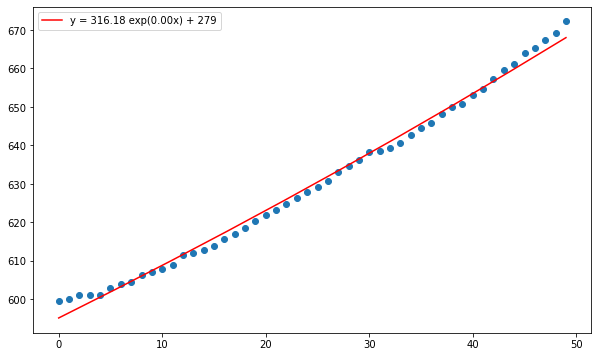

In [49]:
x_range = np.linspace(0, 49, 10)
y_range = c1 * np.exp(x_r[1]*x_range)

plt.figure(figsize=(10, 6))
plt.scatter(x, y + 279)
plt.plot(x_range, y_range + 279, c='r', label="y = %.2f exp(%.2fx) + 279" % (c1, x_r[1]))
plt.legend()

plt.show()

In [50]:
def estimacion(x):
  y = c1 * np.exp( x_r[1] * x)
  return y

In [51]:
error = np.sqrt(sum((y - estimacion(x))**2) / 50)
print("RMSE: %f" % error)

RMSE: 1.686136


# Punto 9
The file scrippsm.txt, available from the textbook website, is a list of 180 numbers
which represent the concentration of atmospheric carbon dioxide, in parts per million by
volume (ppv), recorded monthly at Mauna Loa from Jan. 1996 to Dec. 2010, taken from
the same Scripps study as Computer Problem 8

(a) Carry out a least squares fit of the CO 2 data using the model
$$f (t) = c_1 + c_2 t + c_3 \cos 2\pi t + c_4 \sin 2\pi t$$
where t is measured in months. Report the best fit coefficients c i and the RMSE of the fit.
Plot the continuous curve from Jan. 1989 to the end of this year, including the 180 data
points in the plot

In [52]:
x = np.linspace(0, 15, 180)

## Cargamos el archivo txt el cual contiene 180 datos de la concentración de dióxido de carbono atmosférico mensual desde Enero. 1996 a Dic. 2010,
y = np.loadtxt('scrippsm.txt') 

## Si pones los archivo en el sample_data usar la linea de abajo
##y = np.loadtxt('/content/sample_data/scrippsm.txt', dtype=int)

A0 = np.ones(180)
A1 = np.array(x)
A2 = np.cos(2*pi*x)
A3 = np.sin(2*pi*x)

A = np.array([ A0.T , A1.T, A2.T, A3.T]).T
b = np.array(y)

B = A.T@A
C = A.T@b

x_r = linalg.solve(B,C)

print("La funcion es: y = %.2f + %.2f t + %.2f cos(2πt) + %.2f sin(2πt)" % (x_r[0], x_r[1], x_r[2], x_r[3]))


La funcion es: y = 361.18 + 1.94 t + -0.97 cos(2πt) + 2.76 sin(2πt)


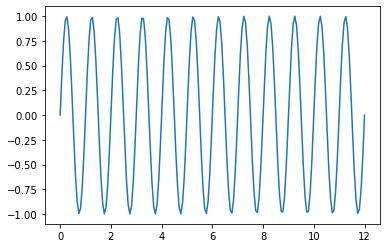